###Bitcoin Price (time-series data) prediction using Facebook Prophet

In [24]:
# Install Necessary libraries
!pip install plotly

In [25]:
!pip install prophet

In [26]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [27]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = "colab"

In [28]:
df=pd.read_csv("bitcoin_data.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [30]:
df.head()

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34


In [31]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


### Data Visualization

In [32]:
# Area graph (Date Vs Price)
px.area(df, x="Date", y="Close", title="Bitcoin Price Graph")

In [33]:
# Violin plot
px.violin(df, y="Close", title="Bitcoin Price Violin Plot")

# Facebook Prophet Model

### Data Preperation

In [34]:
prophet_df=df.rename(columns={'Date':'ds','Close':'y'})

In [35]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


### Modelling

In [36]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2lh8kmiz/pkoy5vgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2lh8kmiz/hpskzw0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93875', 'data', 'file=/tmp/tmp2lh8kmiz/pkoy5vgb.json', 'init=/tmp/tmp2lh8kmiz/hpskzw0e.json', 'output', 'file=/tmp/tmp2lh8kmiz/prophet_modelzr4dwnqv/prophet_model-20240908190343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:03:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:03:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1097.229048,-70.968734,2736.960766,1097.229048,1097.229048,252.072989,252.072989,252.072989,-3.414222,-3.414222,-3.414222,255.487210,255.487210,255.487210,0.0,0.0,0.0,1349.302037
1,2016-01-02,1092.799955,-78.423865,2785.566261,1092.799955,1092.799955,234.526332,234.526332,234.526332,15.189991,15.189991,15.189991,219.336341,219.336341,219.336341,0.0,0.0,0.0,1327.326287
2,2016-01-03,1088.370861,-108.462300,2661.914607,1088.370861,1088.370861,176.309857,176.309857,176.309857,-9.008198,-9.008198,-9.008198,185.318056,185.318056,185.318056,0.0,0.0,0.0,1264.680718
3,2016-01-04,1083.941767,-52.421494,2643.298882,1083.941767,1083.941767,172.161024,172.161024,172.161024,18.540795,18.540795,18.540795,153.620229,153.620229,153.620229,0.0,0.0,0.0,1256.102791
4,2016-01-05,1079.512673,-187.377097,2622.736874,1079.512673,1079.512673,120.113360,120.113360,120.113360,-4.189440,-4.189440,-4.189440,124.302800,124.302800,124.302800,0.0,0.0,0.0,1199.626033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9060.258108,7608.179499,10491.046755,9010.602200,9097.271178,-6.364719,-6.364719,-6.364719,15.189991,15.189991,15.189991,-21.554710,-21.554710,-21.554710,0.0,0.0,0.0,9053.893388
1731,2020-09-27,9060.791921,7580.529836,10513.056383,8997.151366,9102.644508,-71.297186,-71.297186,-71.297186,-9.008198,-9.008198,-9.008198,-62.288988,-62.288988,-62.288988,0.0,0.0,0.0,8989.494735
1732,2020-09-28,9061.325734,7623.163164,10295.407980,8992.582167,9108.497861,-84.208891,-84.208891,-84.208891,18.540795,18.540795,18.540795,-102.749686,-102.749686,-102.749686,0.0,0.0,0.0,8977.116843
1733,2020-09-29,9061.859547,7429.962486,10376.807517,8985.977979,9112.811073,-146.815422,-146.815422,-146.815422,-4.189440,-4.189440,-4.189440,-142.625983,-142.625983,-142.625983,0.0,0.0,0.0,8915.044125


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version 

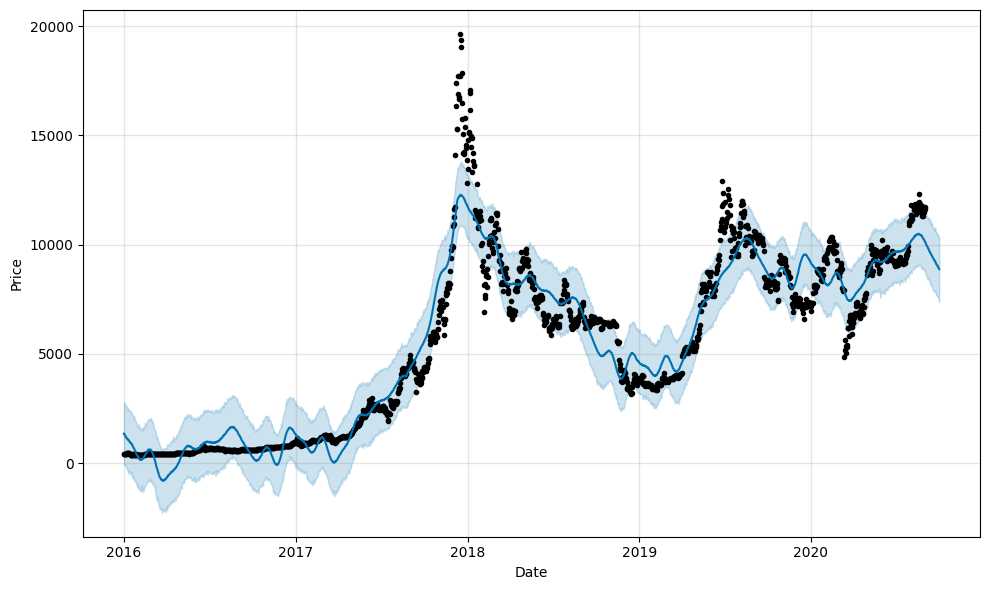

In [39]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')
# plot to compare original data with predicted data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

forecast_actual = forecast[forecast['ds'].isin(prophet_df['ds'])]

# Extract actual and predicted values
y_true = prophet_df['y'].values
y_pred = forecast_actual['yhat'].values

In [41]:
forecast.to_csv('Predicted.csv')

In [42]:
# Calculate MAE, MSE, RMSE, and MAPE
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 780.6809532379226
MSE: 1221984.206462887
RMSE: 1105.4339448663982
MAPE: 30.556181150136947%


###Tuning

In [47]:
from prophet import Prophet

# Tune Prophet hyperparameters
m = Prophet(
    seasonality_mode='multiplicative',  # Use multiplicative seasonality for financial data
    changepoint_prior_scale=0.15,
    seasonality_prior_scale=10,
    yearly_seasonality=True,            # Allow yearly seasonality to capture potential annual patterns
    weekly_seasonality=True             # Capture potential weekly patterns
)

m.fit(prophet_df)

# Forecast future prices - 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

forecast_actual = forecast[forecast['ds'].isin(prophet_df['ds'])]

y_true = prophet_df['y'].values
y_pred = forecast_actual['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2lh8kmiz/re279sxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2lh8kmiz/dmy0gbha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70232', 'data', 'file=/tmp/tmp2lh8kmiz/re279sxq.json', 'init=/tmp/tmp2lh8kmiz/dmy0gbha.json', 'output', 'file=/tmp/tmp2lh8kmiz/prophet_model5yo79e02/prophet_model-20240908190547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:05:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 478.23591525464025
MSE: 553332.2125527998
RMSE: 743.8630334630159
MAPE: 8.95989137989581%


In [48]:
forecast.to_csv('Prediction_tuned.csv')

#Neural Prophet

In [21]:
pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 37.6 MB/s eta 0:00:00


In [62]:
from neuralprophet import NeuralProphet

df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [63]:
df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [64]:
#train neural prophet model
model = NeuralProphet()
model.fit(df, freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (54) is too small than the required number                     for the learning rate finder (231). The results might not be optimal.


Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.384354,0.0,7143.086914,9164.492188,0.381281,0.0,0
1,0.229791,0.0,4835.562012,6152.391602,0.229100,0.0,1
2,0.124719,0.0,3160.319336,4034.193359,0.123520,0.0,2
3,0.068484,0.0,2191.843994,3017.529053,0.067958,0.0,3
4,0.052712,0.0,1795.416992,2678.706787,0.052743,0.0,4
...,...,...,...,...,...,...,...
95,0.012806,0.0,760.655029,1114.603882,0.012823,0.0,95
96,0.012810,0.0,750.358948,1106.123901,0.012681,0.0,96
97,0.012793,0.0,753.453552,1126.454224,0.012772,0.0,97
98,0.012808,0.0,774.102356,1141.699829,0.013601,0.0,98


In [65]:
future = model.make_future_dataframe(df, periods=30)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.941% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.941% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

forecast_actual = forecast[forecast['ds'].isin(df['ds'])]

# Extract actual and predicted values
y_true = df['y'].values
y_pred = forecast_actual['yhat1'].values

In [68]:
forecast.to_csv('Prediction_NeuralProphet.csv')

#LSTM


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col='Date')
data = df['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

In [33]:
# Convert to PyTorch Tensors and Create DataLoader
# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

In [34]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create data loaders
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)

In [35]:
import torch.nn as nn

# Define the model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h_lstm, _ = self.lstm(x)
        out = self.fc(h_lstm[:, -1, :])
        return out

# Initialize the model
input_dim = 1
hidden_dim = 50
output_dim = 1
num_layers = 2
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)

In [36]:
import torch.optim as optim

# Training loop
num_epochs = 10
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in data_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.18472550809383392
Epoch 2/10, Loss: 0.07226213067770004
Epoch 3/10, Loss: 0.02691666968166828
Epoch 4/10, Loss: 0.002284012269228697
Epoch 5/10, Loss: 0.0027756481431424618
Epoch 6/10, Loss: 0.009428041987121105
Epoch 7/10, Loss: 0.0026397844776511192
Epoch 8/10, Loss: 0.0003399931883905083
Epoch 9/10, Loss: 0.0003052160900551826
Epoch 10/10, Loss: 0.00030287454137578607


In [37]:
#Generate Future Predictions
# Create a DataFrame for future dates
future_dates = pd.date_range(start='2020-09-01', end='2020-09-30', freq='D')
future_df = pd.DataFrame(index=future_dates)

# Prepare input for prediction
last_sequence = data_scaled[-seq_length:]
last_sequence = torch.tensor(last_sequence.reshape(1, seq_length, 1), dtype=torch.float32)

# Generate predictions for the future dates
model.eval()
with torch.no_grad():
    predictions = []
    for _ in future_dates:
        y_pred = model(last_sequence).numpy()
        predictions.append(y_pred[0, 0])
        last_sequence = torch.cat((last_sequence[:, 1:, :], torch.tensor(y_pred.reshape(1, 1, 1), dtype=torch.float32)), dim=1)

# Reverse normalization
predictions_original = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [39]:
# Prepare the DataFrame for export
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted': predictions_original.flatten()
})
forecast_df.to_excel('bitcoin_predictions.xlsx', index=False)